# Systemy uczące się - Algorytm oczekiwanie-maksymalizacja

### Ćwiczenie 1 - implementacja k-means
Wygeneruj zbiór danych

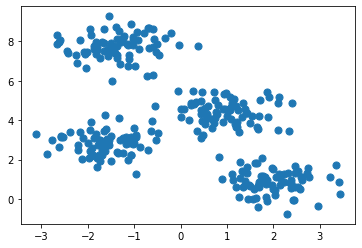

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)


plt.scatter(X[:, 0], X[:, 1], s=50);

Algorytm k-średnich, zaraz po inicjalizacji początkowych wartości centroidów, składa się z 2 podstawowych, powtarzanych iteracyjnie kroków:
- *expectation* - przypisanie każdego elementu zbiory danych do najbliższego centroidu
- *maximization* - aktualizacja centroidów. Centroid jest wyznaczany jako średnia arytmetyczna po wszystkich przypisanych do niego punktach

Zaimplementuj ten algorytm. W implementacji może być pomocna funkcja `pairwise_distances_argmin` [[dokumentacja]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html)

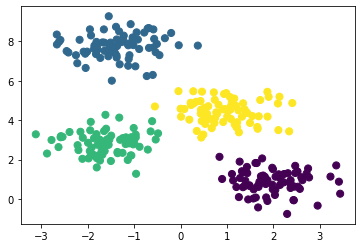

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, k, metric='euclidean'):
    """Znajduje skupienia algorytmem k-średnich
     X - zbiór danych
     k - liczba szukanych grup
     Na wyjście zwracany jest wektor zawierający przypisania każdego elementu z X do skupienia
     np. [0,1,1] dla 3-elementowego X i k=2 oznacza że pierwszy element należy
     do grupy pierwszej, a element drugi i trzeci należą do grupy drugiej.
     """
# YOUR CODE HERE
    curr_points = last_points= X[np.random.choice(len(X), size=k, replace=False)]
    for i in range(100):
        labels = pairwise_distances_argmin(X, curr_points, axis=1, metric=metric)
        curr_points = np.array([np.mean(X[labels == i], axis=0) if np.any(labels == i) else curr_points[i] for i in range(k)])
        if np.all(np.abs(last_points - curr_points) < 2e-6): return labels
        last_points = curr_points
    return labels

labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Przetestuj działanie metody dla innych danych:
```
from sklearn.datasets import make_moons, make_circles
X, _ = make_moons(200, noise=.05, random_state=0)
```
oraz
```
X,_ = make_circles(n_samples=1000, factor=0.3, noise=0.1)
```
czy algorytm k-średnich potrafi je zgrupować w sposób zgodny z oczekiwaniami? Jakie rodzaje kształtów potrafi wykrywać algorytm k-średnich?

Algorytm KMeans zdolny jest jedynie do wykrywania zgrupowań w kształtach zbliżonych do koła elips a więc gfy ma do czynienia z "rogalikami" bądż też kołem uwięzionym w pierścieniu nie jest w stanie dokonąć oczekiwanego podziału.

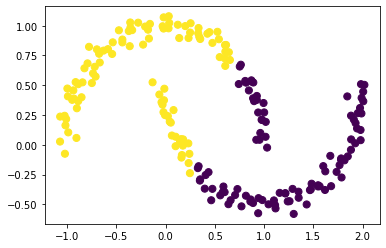

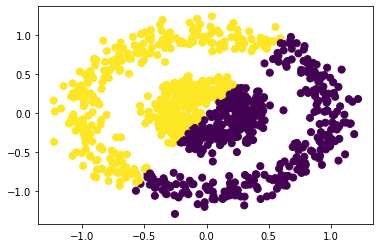

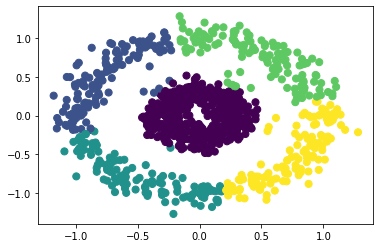

In [ ]:
from sklearn.datasets import make_moons, make_circles
X,_ =  make_moons(200, noise=.05, random_state=0)
labels = find_clusters(X, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.show()

X,_ = make_circles(n_samples=1000, factor=0.3, noise=0.1)
labels = find_clusters(X, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.show()

X,_ = make_circles(n_samples=1000, factor=0.3, noise=0.1)
labels = find_clusters(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
plt.show()

Przetesuj działanie profesjonalnej implementacji algorytm k-średnich z pakietu sklearn
```
from sklearn.cluster import KMeans
```
ponieważ problem jest nienadzorowany, funkcja `fit()` przyjmie tylko jeden argument (`X`). Liczbę grup możesz określić poprzez parametr konstruktora `n_clusters = 5`. Przypisanie obserwacji do poszczególnych grup możesz odczytać z włąściwości `labels_` wytrenowanego obiektu `KMeans`. Narysuj wynik grupowania.

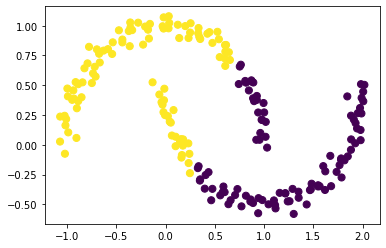

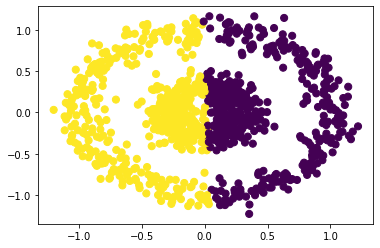

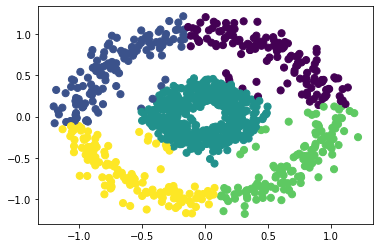

In [ ]:
from sklearn.cluster import KMeans
X,_ = make_moons(200, noise=.05, random_state=0)
labels = KMeans(n_clusters=2)
labels.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=labels.labels_, s=50, cmap='viridis')

plt.show()


X,_ = make_circles(n_samples=1000, factor=0.3, noise=0.1)
labels = KMeans(n_clusters=2)
labels.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=labels.labels_, s=50, cmap='viridis')
plt.show()

X,_ = make_circles(n_samples=1000, factor=0.3, noise=0.1)
labels = KMeans(n_clusters=5)
labels.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=labels.labels_, s=50, cmap='viridis')
plt.show()

O algorytmie k-średnich często mówi się, że wykrywa skupiska sferyczne.
```
from helpers import get_quasispherical_data
X = get_quasispherical_data()```

Sprawdź tę hipotezę na podanych trudniejszych danych sferycznych (no właśnie czy są one sferyczne?). Czy nawet gdyby wybrać centroidy jako prawdziwe centra skupisk, otrzymalibyśmy prawidłowe grupowanie? Dlaczego?

Tak jak poprzednio KMeans próbuje znaleść skupiska a kształcie elipsy. DLa elipsy w pierścieniu centroidy nachodziłyby w takim wypadku na siebie, a więc nie dałoby to dobrych wyników. Dla księżycy część punktów z jednego zgrupowania "nachodziłaby" na centroidę drugiego zgrupowania.

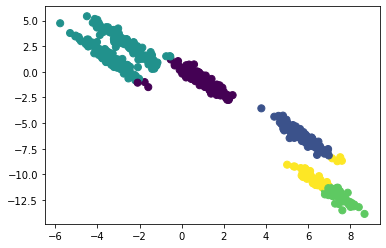

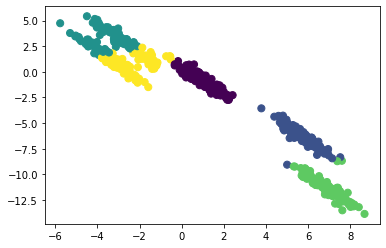

In [ ]:
from helpers import get_quasispherical_data
X = get_quasispherical_data()
labels = find_clusters(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')
plt.show()

labels = KMeans(n_clusters=5)
labels.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=labels.labels_, s=50, cmap='viridis')
plt.show()

**Ćwiczenia**
- Uruchom swój algorytm kilka razy - czy za każdym razem dostajesz ten sam wynik? Co ci to mówi o specyfice rozwiązowanego problemu i algortmie k-średnich jako algorytmie optymalizacyjnym?
- Twój algorytm uruchamiałeś z apriori znaną liczbą grup $k=4$, przetestuj działanie algorytmu dla $k=5$. Uruchom swój algorytm kilka razy - czy za każdym razem dostajesz ten sam wynik? Co ci to mówi o algortmie k-średnich jako algorytmie optymalizacyjnym?
- Jak w praktyce możemy próbować choć trochę ograniczyć problem algorytmu dot. utykania w minimach lokalnych?


Twierdzenie Klainverga'a mówi, że nie istnieje taki algorytm, który spełnia wszystkie trzy kryteria spośród: niezmienność,zgodność oraz zupełność grupowania. Prowadzi to do każdorazowo innego wyniku.
Można nieznacznie ulepszyć algorytm przy pomocy początkowych centroidów ponieważ Kmeans jest na nie wrażliwy.

## Zadanie 2 - parametry wielowymiarowego rozkładu normalnego

Poniższy kod służy do rysowania dwuwymiarowego rozkładu normalnego o wektorze średnich $[0,0]$ i macierzy kowariancji równej $[[1, 0], [0, 1]]$

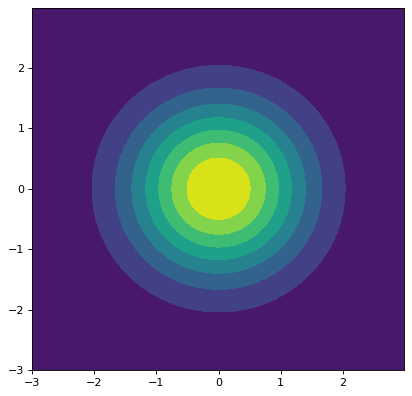

In [ ]:
from scipy.stats import multivariate_normal
from matplotlib.pyplot import figure
figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
normal = multivariate_normal([0, 0], [[1, 0], [0, 1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmienisz wektor średnich  na np. $[1,0]$


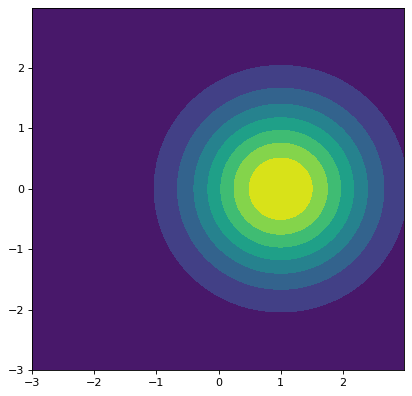

In [ ]:
from scipy.stats import multivariate_normal
from matplotlib.pyplot import figure
figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
normal = multivariate_normal([1, 0], [[1, 0], [0, 1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmodyfikujesz macierz kowariancji na wielokrotność macierzy jednostkowej. (Warto wrócić do oryginalnego ustawienia wektora średnich, aby wycentrować wykres)

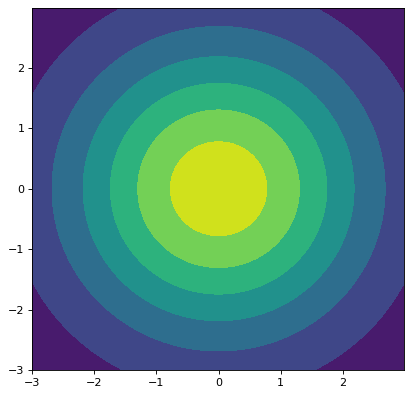

In [ ]:
from scipy.stats import multivariate_normal
from matplotlib.pyplot import figure
figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
normal = multivariate_normal([0, 0], [[3, 0], [0, 3]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmodyfikujesz macierz kowariancji na inną macierz diagonalną

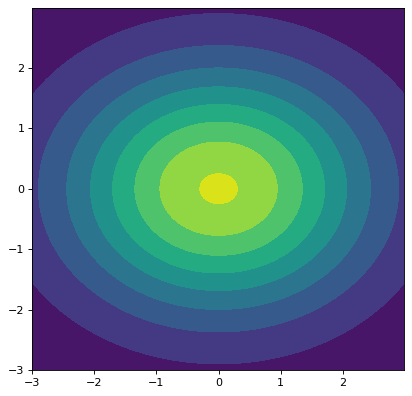

In [ ]:
from scipy.stats import multivariate_normal
from matplotlib.pyplot import figure
figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
normal = multivariate_normal([0, 0], [[3, 0], [0, 2]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

Sprawdź jak zmieni się dwuwymiarowy rozkład normalny, jeżeli zmodyfikujesz macierz kowariancji na inną macierz symetryczną np. $[[1, 0.9], [0.9, 1]]$

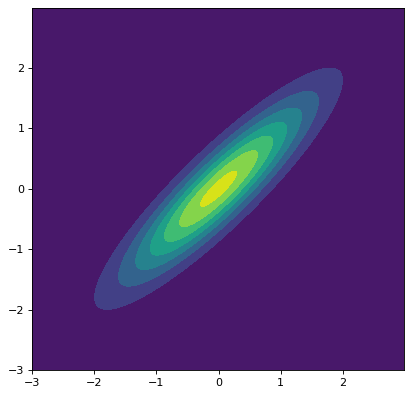

In [ ]:
from scipy.stats import multivariate_normal
from matplotlib.pyplot import figure
figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
normal = multivariate_normal([0, 0], [[1,0.9],[0.9,1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)

Macierz kowariancji musi być symetryczna, jednak sama własność symetryczności macierzy nie wystarcza. Spróbuj zwizualizować rozkład o macierzy $[[1, 1], [1, 1]]$. Dlaczego nie jest to możliwe? Wyjaśnij używając zarówno formalizmu matematycznego jak i intuicji. (Jak wyglądałby wykres takiego rozkładu?)

Intuicyjnie: Dla macierzy $[[1, 0.9], [0.9, 1]]$ wykres rozkładu normalnego staje się bardzo spłaszczony. Możliwe, że jako rezultat dla $[[1, 1], [1, 1]]$ hiperpłaszczyzna zupełnie by zanikła.

Macierz  $[[1, 1], [1, 1]]$ jest mnacierzą osobliwą w związku z czym nie istnieje dla niej funckja gęstości prawdopodobieństwa.

Dodatkowo: rozkład narmalny wymaga aby macierz kowariancji była dodatnio półokreślona, czyli wszystkie pierwiastki charakterystyczne jej wielomianu muszą być nieujemne.

In [ ]:
"""
figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
normal = multivariate_normal([0, 0], [[1,1],[1,1]])
densities = normal.pdf(points)
plt.contourf(x, y, densities)
"""

'\nfigure(figsize=(6, 6), dpi=80)\nx, y = np.mgrid[-3:3:.01, -3:3:.01]\npoints = np.dstack((x, y))\nnormal = multivariate_normal([0, 0], [[1,1],[1,1]])\ndensities = normal.pdf(points)\nplt.contourf(x, y, densities)\n'

Korzystając z funkcji `multivariate_normal`, zwizualizuj mieszaninę dwóch rozkładów normalnych:
$$P(x) = \tau N(x; \mu_1, \Sigma_1) + (1-\tau) N(x; \mu_2, \Sigma_2) $$

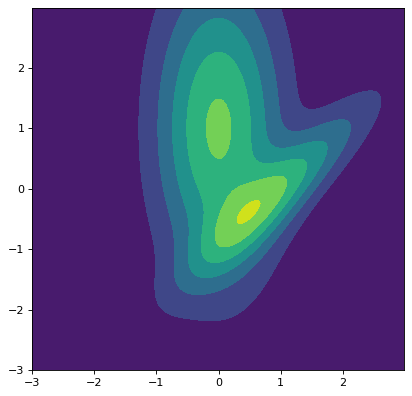

In [ ]:
figure(figsize=(6, 6), dpi=80)
x, y = np.mgrid[-3:3:.01, -3:3:.01]
points = np.dstack((x, y))
t = 0.2
normal1 = multivariate_normal([1, 0], [[1, 0.9], [0.9, 1]])
normal2 = multivariate_normal([0, 1], [[0.5, 0], [0, 3]])
d1 = normal1.pdf(points)
d2 = normal2.pdf(points)
densities = t*d1 + (1-t)*d2
plt.contourf(x, y, densities)

**Ćwiczenia**
1. Poeksperymentuj z różnymi ustawieniami mieszaniny. Na co wpływa parametr $\tau$?
2. Rozważając mieszaninę rozkładów normalnych o dowolnej liczbie komponentów - czy istnieją rozkłady, których nie można zamodelować? Odpowiedź uzasadnij używając zdobytych intuicji.

ad 1. $\tau$ wpływa na prawdopodobieństwo punktu z rozkłądu normalnego.

ad 2. Jeśli wykorzystamy dostanecznie dużą ilość skłądników można zamodelować każdy rozkład ciągły.

## Zadanie 3 - EM dla mieszaniny jednowymiarowej
Dane są dane wygenerowane z poniższej mieszaniny rozkładów normalnych:

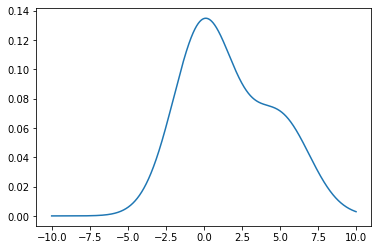

In [ ]:
from scipy.stats import norm

x_axis = np.arange(-10, 10, 0.001)
plt.plot(x_axis, 0.66*norm.pdf(x_axis,0,2) + 0.33* norm.pdf(x_axis,5,2))
plt.show()

data = np.concatenate((np.random.normal(0,2, 66), np.random.normal(5,2, 33)))

Zwizualizuj dane na histogramie. Zwróć uwagę, że dobór odpowiednich $\mu_1, \mu_2, \sigma_1, \sigma_2$ na podstawie danych nie jest oczywisty

(array([ 2.,  7., 14., 23., 15., 11., 10., 11.,  3.,  3.]),
 array([-4.95005455, -3.52178414, -2.09351373, -0.66524333,  0.76302708,
         2.19129749,  3.61956789,  5.0478383 ,  6.47610871,  7.90437911,
         9.33264952]),
 <a list of 10 Patch objects>)

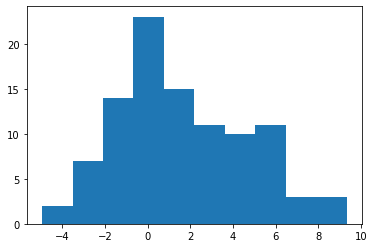

In [ ]:
plt.hist(data)

Zaimplementuj algorytm EM dla powyższego problemu. Zwizualizuj kolejne kroki algorytmu (tj. narysuj wykres mikstury co kilka iteracji)

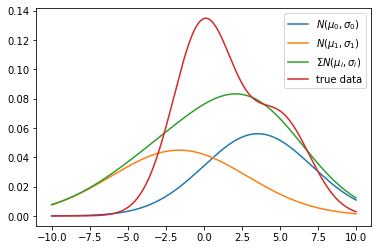

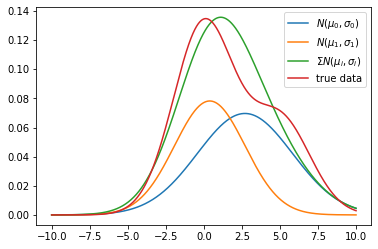

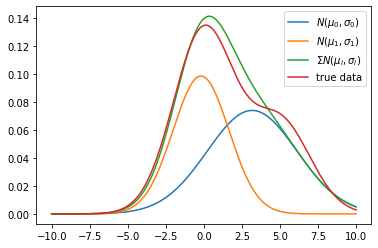

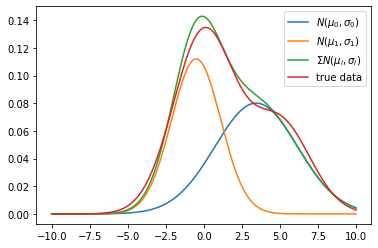

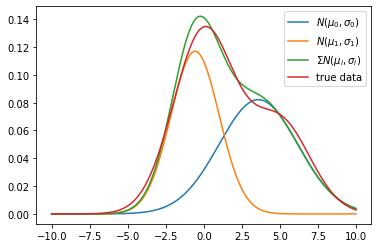

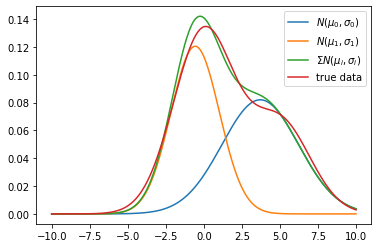

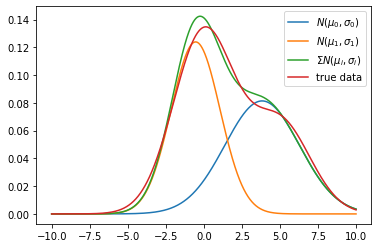

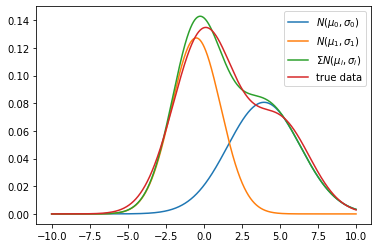

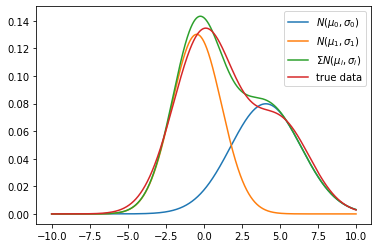

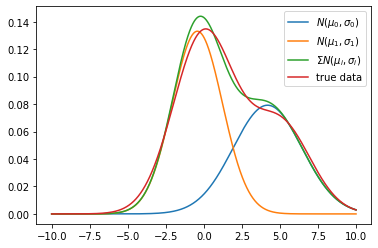

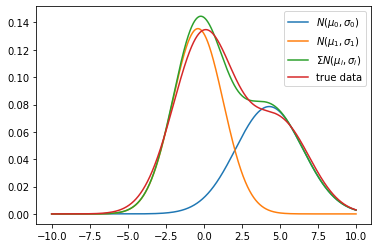

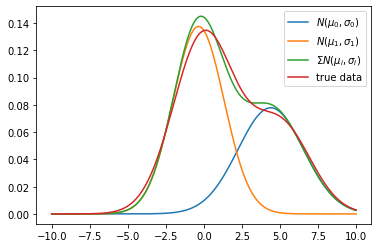

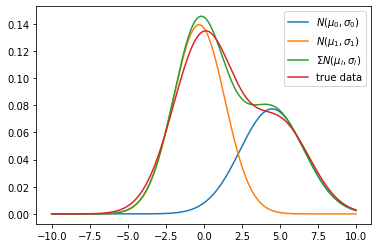

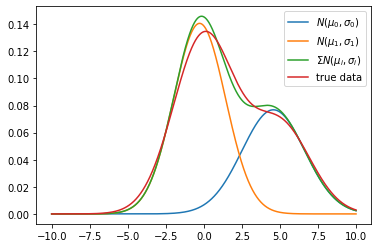

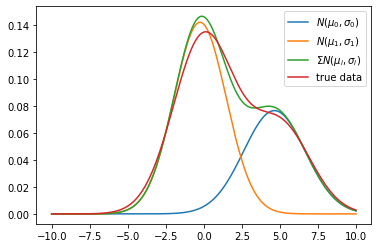

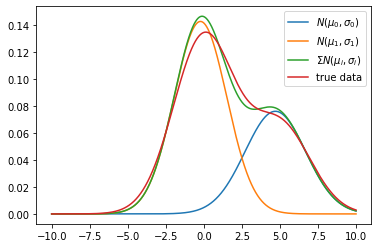

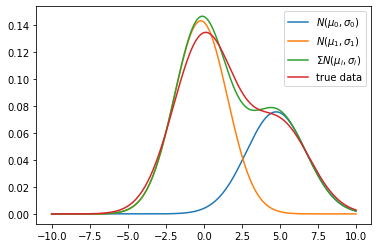

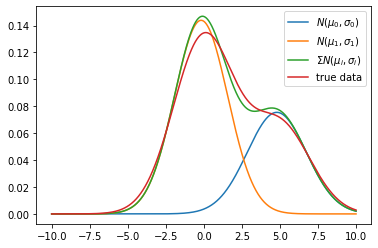

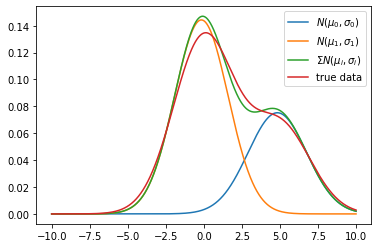

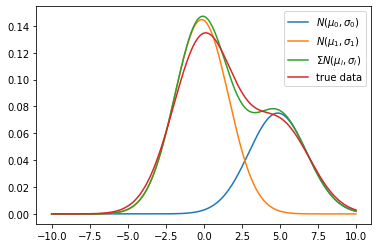

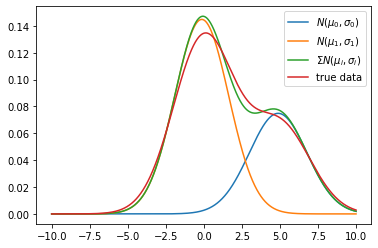

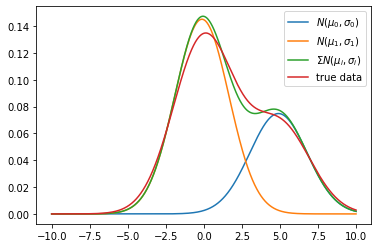

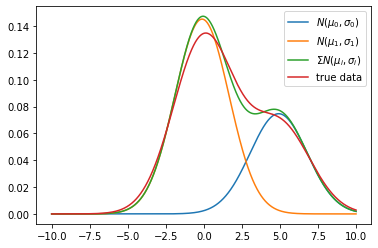

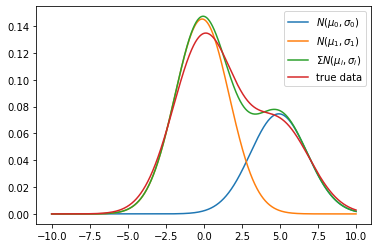

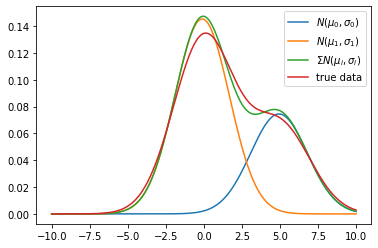

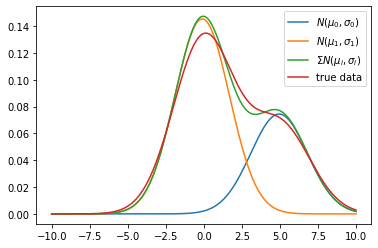

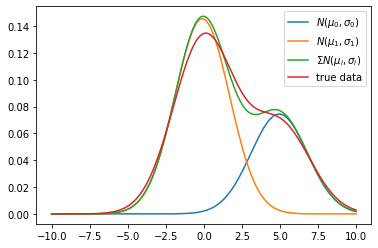

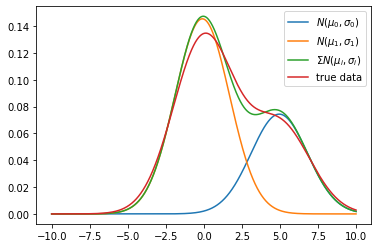

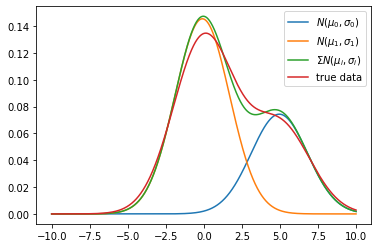

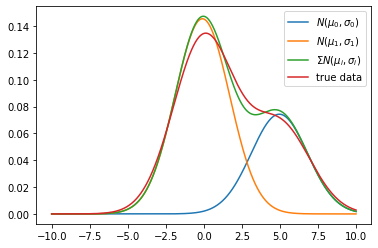

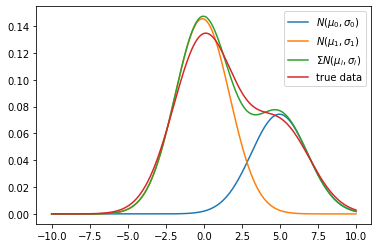

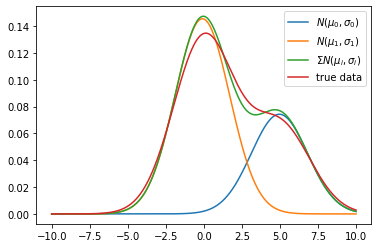

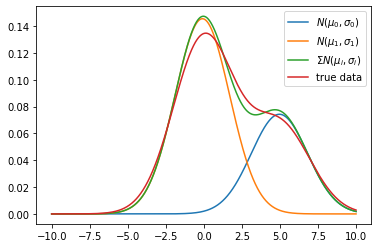

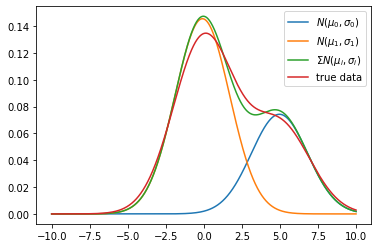

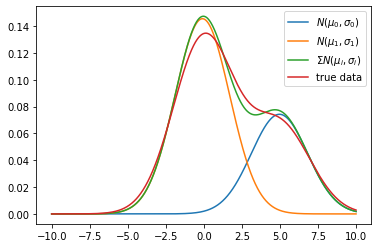

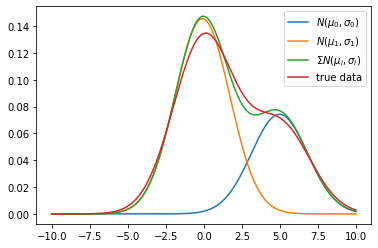

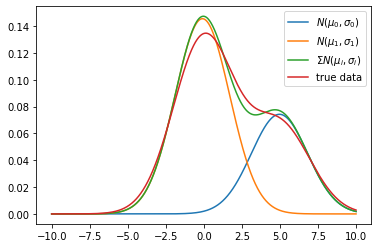

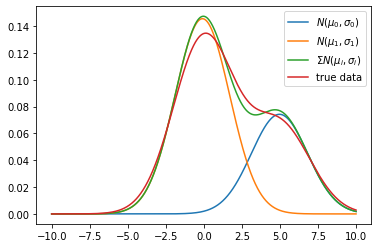

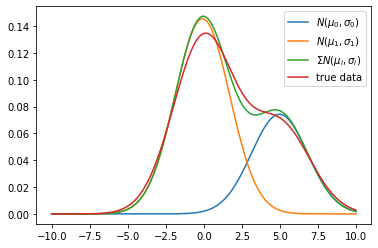

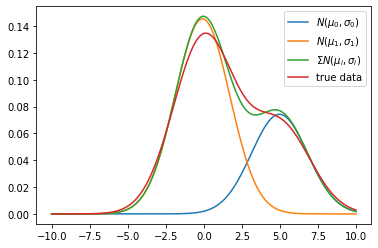

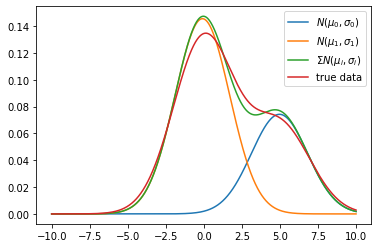

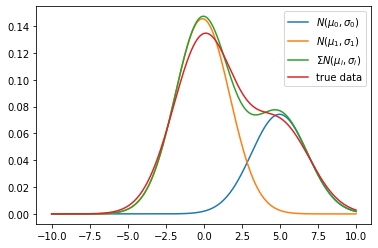

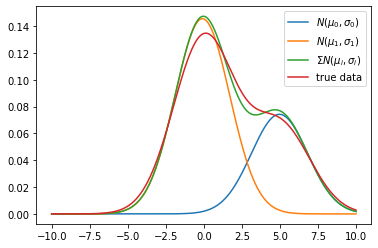

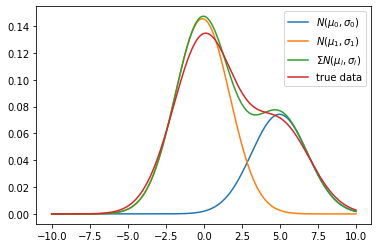

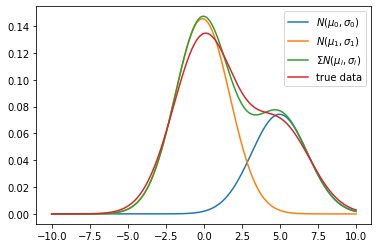

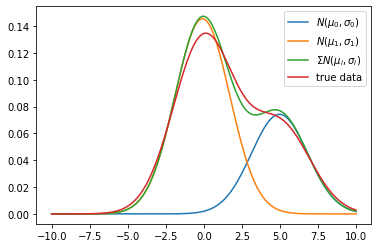

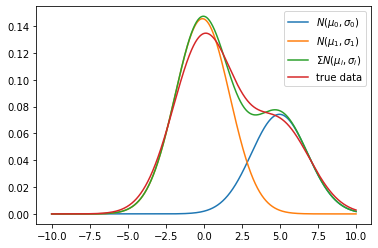

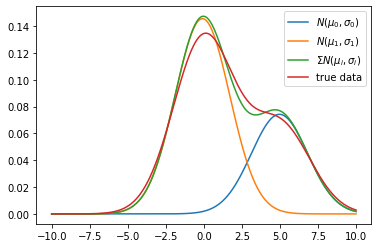

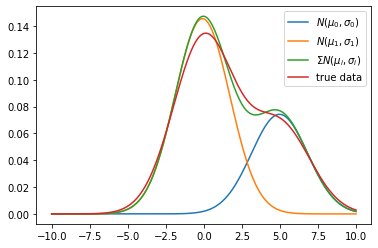

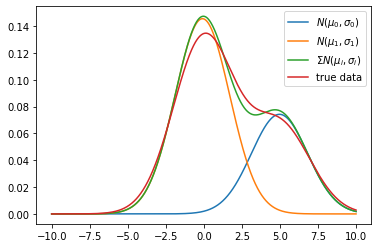

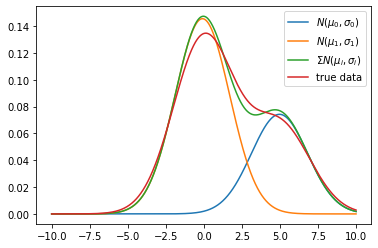

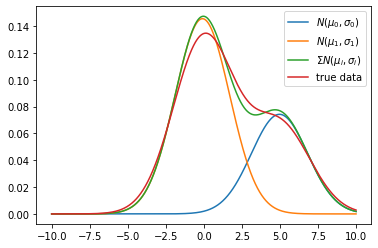

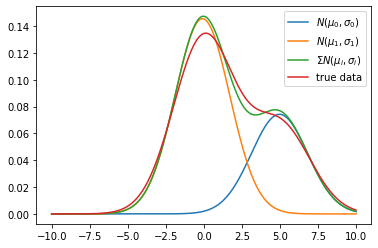

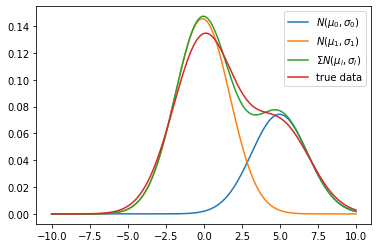

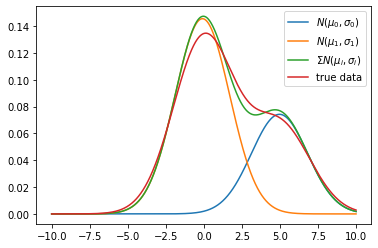

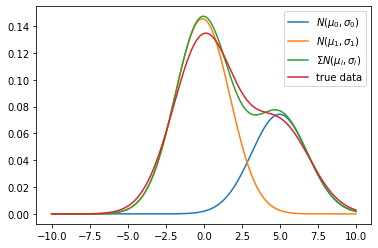

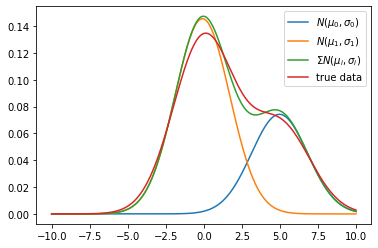

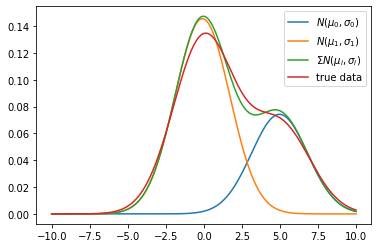

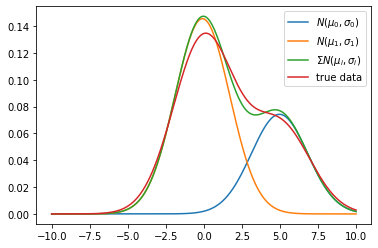

Stopped earky after 290 iters


(array([[0.34393842],
        [0.65606158]]), array([[ 4.96943536],
        [-0.09394058]]), array([[3.4136594 ],
        [3.23236406]]))

In [ ]:


def plot(iter, k, mu, sigma, pi,freq=10):
    plt.subplots()
    res = np.zeros_like(x_axis)
    for i in range(k):
        y = pi[i]*norm.pdf(x_axis, mu[i], np.sqrt(sigma[i]))
        res += y
        plt.plot(x_axis, y, label=f'$N(\mu_{i}, \sigma_{i})$')
    plt.plot(x_axis, res, label='$\Sigma N(\mu_i,\sigma_i)$')
    plt.plot(x_axis, 0.66*norm.pdf(x_axis,0,2) + 0.33*norm.pdf(x_axis,5,2), label="true data")
    plt.legend()
    plt.show()

def EM(X, k):
    pi,mu = np.ones((k, 1))/k,np.random.choice(X, k)[:,np.newaxis]
    si = ((X - mu)**2).mean(1, keepdims=True)

    for iter in range(800):
        if iter%5==0:
            plot(iter, k,mu,si,pi)

        weight = pi * norm.pdf(X, mu, np.sqrt(si))
        weight /= weight.sum(0)

        pi1 = np.mean(weight, axis=1, keepdims=True)
        div=np.sum(weight, axis=1, keepdims=True)
        mu1 = np.sum((weight*X),1, keepdims=True) / div
        si1 = np.sum((weight*(X - mu)**2),1, keepdims=True) / div

        if np.all(np.abs(mu - mu1) + np.abs(si - si1)+(np.abs(pi - pi1))/3 < 1e-6):
            if iter%10 != 0:
              plot(iter, k,mu,si,pi)
            print(f'Stopped earky after {iter} iters')
            break

        pi,mu,si = pi1, mu1, si1

    return pi,mu,si

EM(data, k=2)

Skorzystaj z gotowej implementacji EM-GMM w pakiecie `sklearn` dla danych z elipsami:
```
from helpers import get_quasispherical_data
X = get_quasispherical_data()```

Czy algorytm EM lepiej poradził sobie z tymi danymi niż k-Means?

Tak. Poradził sobie lepiej z KMeans, jednak nadal miał preblem z grupowaniem niektórych sąsiadów.

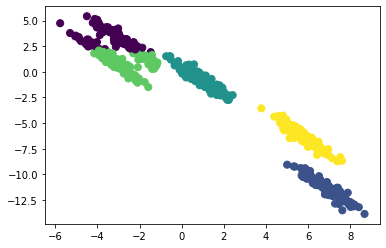

In [ ]:
from sklearn.mixture import GaussianMixture
from helpers import get_quasispherical_data
X = get_quasispherical_data()
labels = GaussianMixture(n_components=5)
plt.scatter(X[:, 0], X[:, 1], c=labels.fit_predict(X), s=50, cmap='viridis')

Wykonaj proces strojenia parametru $K$ metody EM-GMM poprzez narysowanie wykresu funkcji wiarygodności dla różnych $K$ na zbiorze uczącym i testowym. Sprawdź czy wybrana liczba elementów mikstury odpowiada intuicji.

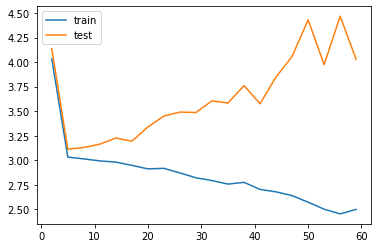

In [ ]:
from sklearn.model_selection import train_test_split
l = list(np.arange(2, 60, 3))
y_tr,y_te = [],[]
X_tr, X_te = train_test_split(X, test_size=.2)
for k in l:
    labels = GaussianMixture(n_components=k)
    labels.fit_predict(X_tr)
    y_tr.append(-labels.score(X_tr))
    y_te.append(-labels.score(X_te))

plt.plot(l, y_tr, label='train')
plt.plot(l, y_te, label='test')
plt.legend()
plt.show()